In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from tqdm import tqdm
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [0]:
path = "/content/drive/My Drive/ML_Term_Project/"
data_df = pd.read_csv(path + "dataset_1.csv")
###data_df = pd.read_csv("dataset_1.csv")

In [0]:
data_df.head()

,Unnamed: 0,Unnamed: 0.1,count,hate_speech,offensive_language,neither,class,tweet
0,0,0,3,0,0,3,2,!!! As a woman you shouldn't complain about cl...
1,1,1,3,0,3,0,1,!!!!! boy dats cold...tyga dwn bad for cuffin ...
2,2,2,3,0,3,0,1,!!!!!!! Dawg!!!! You ever fuck a bitch and she...
3,3,3,3,0,2,1,1,!!!!!!!!! she look like a tranny
4,4,4,6,0,6,0,1,!!!!!!!!!!!!! The shit you hear about me might...


In [0]:
data_df = data_df.drop(["Unnamed: 0", "Unnamed: 0.1"], axis=1)

In [0]:
"""
@:param range_list represents x-axis values. If your x-axis values are in (1, 20) range,
plot's x-axis's in (1, 20) range.
@:param value_list represents accuracy values
@:param title_str is your plot's title. It must be in string type. 
@:param x_label_str is your x-axis title. For example, 'C values'
@:param y_label_str is your y-axis title. For example, 'Accuracies'
"""

def draw_plot(range_list, value_list, title_str, x_label_str, y_label_str):

    plt.plot(range_list, value_list, color="b", linestyle="dashed", marker="o", markerfacecolor="r")
    plt.title(title_str)
    plt.xlabel(x_label_str)
    plt.ylabel(y_label_str)
    plt.show()

In [0]:
def feature_extract(train_text, stop_word=True, n_gram=(1, 1)):
    # If stop words want to be excluded.
    if stop_word:
    
        tf_idf = TfidfVectorizer(ngram_range=n_gram, stop_words="english")
        tf_idf.fit_transform(train_text)

        train_feature_set = tf_idf.transform(train_text)
        
    # If stop words want to be included
    if not stop_word:
    
        tf_idf = TfidfVectorizer(ngram_range=n_gram)
        tf_idf.fit_transform(train_text)

        train_feature_set = tf_idf.transform(train_text)
        
    return train_feature_set

In [0]:
X = data_df['tweet'].values.astype('U')
y = data_df["class"].values.astype('int32')
X = feature_extract(X)

In [0]:
c_acc_list = []
for c in range(1, 21):
    clf = svm.LinearSVC(C=c, multi_class="ovr")
    scores = cross_val_score(clf, X, y, cv=10)
    c_acc_list.append(scores.mean())
    print("Accuracy C:", c, ": ", scores.mean())

Accuracy C: 1 :  0.8887559942581446
Accuracy C: 2 :  0.8818965346033396
Accuracy C: 3 :  0.876973697704788
Accuracy C: 4 :  0.8741087280045032
Accuracy C: 5 :  0.8713244522756286
Accuracy C: 6 :  0.8691052948072933
Accuracy C: 7 :  0.8666438438004338
Accuracy C: 8 :  0.864868332247538
Accuracy C: 9 :  0.8633349351664557
Accuracy C: 10 :  0.8620436851147704
Accuracy C: 11 :  0.8608331778708708
Accuracy C: 12 :  0.8598243811373081
Accuracy C: 13 :  0.8587752781150201
Accuracy C: 14 :  0.8577260611411889


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy C: 15 :  0.8569593788794396


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy C: 16 :  0.8564751987721884


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy C: 17 :  0.855547193682787


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy C: 18 :  0.854901609353924


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy C: 19 :  0.854054216841973


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy C: 20 :  0.8532472771278741


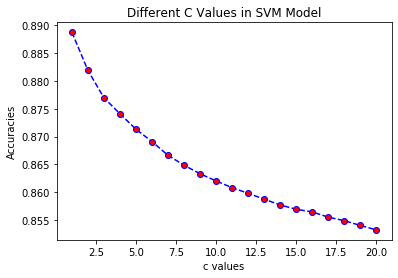

In [0]:
draw_plot(range(1, 21), c_acc_list, "Different C Values in SVM Model", "c values", "Accuracies")

In [0]:
c_val = max(c_acc_list)
c = c_acc_list.index(c_val)
print(c)
c += 1
print(c)

0
1


In [0]:
acc_with_stop = []
acc_wout_stop = []
for kernel_func in ['linear', 'poly', 'rbf', 'sigmoid']:
    
    X = data_df['tweet'].values.astype('U')
    y = data_df["class"].values.astype('int32')
    X = feature_extract(X)

    clf = svm.SVC(C=1, kernel=kernel_func)
    scores = cross_val_score(clf, X, y, cv=10)
    print("Accuracy", kernel_func, ":" , scores.mean())

Accuracy linear : 0.900417551012036
Accuracy poly : 0.7905422498136893
Accuracy rbf : 0.8969871049177904
Accuracy sigmoid : 0.9000946286172697


In [0]:
acc_with_stop = []
acc_wout_stop = []
for i in range(1, 6):
    for stop_word in [True, False]:
        X = data_df['tweet'].values.astype('U')
        y = data_df["class"].values.astype('int32')
        X = feature_extract(X, stop_word=stop_word, n_gram=(i, i))

        clf = svm.LinearSVC(C=c, multi_class="ovr")
        scores = cross_val_score(clf, X, y, cv=10)
        if stop_word:
            acc_wout_stop.append(scores.mean())
            print("Accuracy without stopwords", (i, i), ":" , scores.mean())
        else:
            acc_with_stop.append(scores.mean())
            print("Accuracy with stopwords", (i, i), ":" , scores.mean())

Accuracy without stopwords (1, 1) : 0.8887559942581446
Accuracy with stopwords (1, 1) : 0.8889175287100913
Accuracy without stopwords (2, 2) : 0.7961916254731837
Accuracy with stopwords (2, 2) : 0.8089826373661436
Accuracy without stopwords (3, 3) : 0.7774282015744196
Accuracy with stopwords (3, 3) : 0.7800912654188646
Accuracy without stopwords (4, 4) : 0.7760562249937408
Accuracy with stopwords (4, 4) : 0.7766615518702541
Accuracy without stopwords (5, 5) : 0.7752088487605816
Accuracy with stopwords (5, 5) : 0.7762580494556209


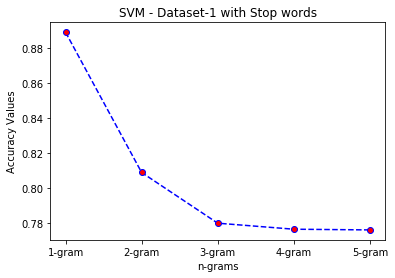

In [0]:
n_grams = ["1-gram", "2-gram", "3-gram", "4-gram", "5-gram"]
draw_plot(n_grams, acc_with_stop, "SVM - Dataset-1 with Stop words", "n-grams", "Accuracy Values")

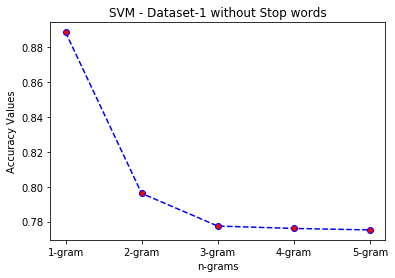

In [0]:
draw_plot(n_grams, acc_wout_stop, "SVM - Dataset-1 without Stop words", "n-grams", "Accuracy Values")